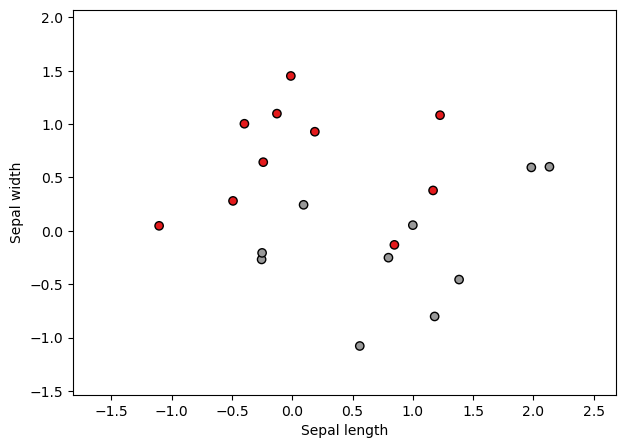

In [113]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as mpl


X, y = make_moons(n_samples=20, noise=0.3, random_state=0)


x_min, x_max = X_iris[:, 0].min() - 0.5, X_iris[:, 0].max() + 0.5
y_min, y_max = X_iris[:, 1].min() - 0.5, X_iris[:, 1].max() + 0.5

plt.figure(figsize=(7, 5))

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

plt.xlim(x_min, x_max)
_ = plt.ylim(y_min, y_max)


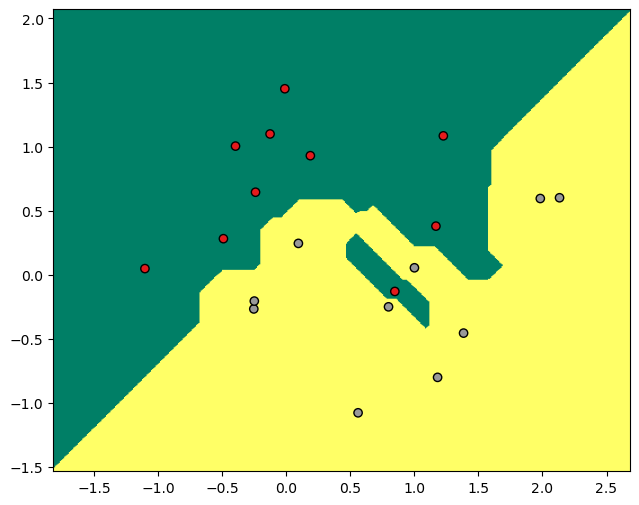

In [114]:
k = 1
s = 20
p = 100

y[y == 0] = -1

n_points = 512
x_ = np.linspace(x_min, x_max, n_points)
y_ = np.linspace(y_min, y_max, n_points)

xx, yy = np.meshgrid(x_, y_)
label = np.zeros(xx.shape)

for i in range(n_points):
    for j in range(n_points):
        point = np.array([xx[i, j], yy[i, j]]) # classify current point
        knn_idx = np.argsort(np.sum(np.abs(X - point)**p, axis=1))[:k]
        label[i, j] = np.sign(y[knn_idx].sum())

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=(y/2+1), cmap=plt.cm.Set1, edgecolor="k")
_ = plt.imshow(np.flipud(label), cmap='summer', extent=[x_min, x_max, y_min, y_max])


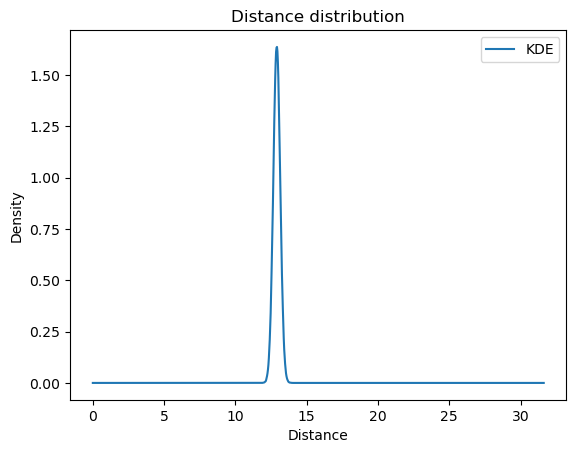

In [118]:
# Distribution of distances in a D-dimensional cube

import pandas as pd
from scipy.stats import gaussian_kde

D = 1000
N = 500

points = np.random.rand(D, N)

distance_matrix = np.zeros((N, N))
for d in range(D):
    distance_matrix += (points[None, d, :] - points[d, :, None])**2


distances = np.sqrt(distance_matrix[np.triu_indices(N, k=1)])

density = gaussian_kde(distances)
xs = np.linspace(0, np.sqrt(D), 1000)
plt.plot(xs, density(xs), label="KDE")
plt.title('Distance distribution')
plt.xlabel('Distance')
plt.ylabel('Density')
plt.legend()


In [91]:
distances[:30]

array([1.56642258, 2.49304544, 2.49977689, 1.85570153, 1.81774661,
       1.3075889 , 1.61667422, 0.75937253, 1.38219934, 1.95260975,
       3.1364265 , 1.89299227, 2.37653867, 2.0957675 , 1.952443  ,
       2.42641258, 3.22798873, 1.26656552, 1.40320107, 3.26013625,
       2.07436184, 1.86746241, 1.79838086, 2.77365766, 3.61037352,
       2.37041565, 1.92152532, 1.63319709, 0.70560512, 1.66364347])